# PCA, tSNE & Clustering

In [172]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [173]:
wine = pd.read_csv("wine.csv")

In [174]:
# Perform PCA to reduce dimensionality before t-SNE
wine_features = wine.iloc[:, :11]
scaler = StandardScaler()
wine_features_standardized = scaler.fit_transform(wine_features)

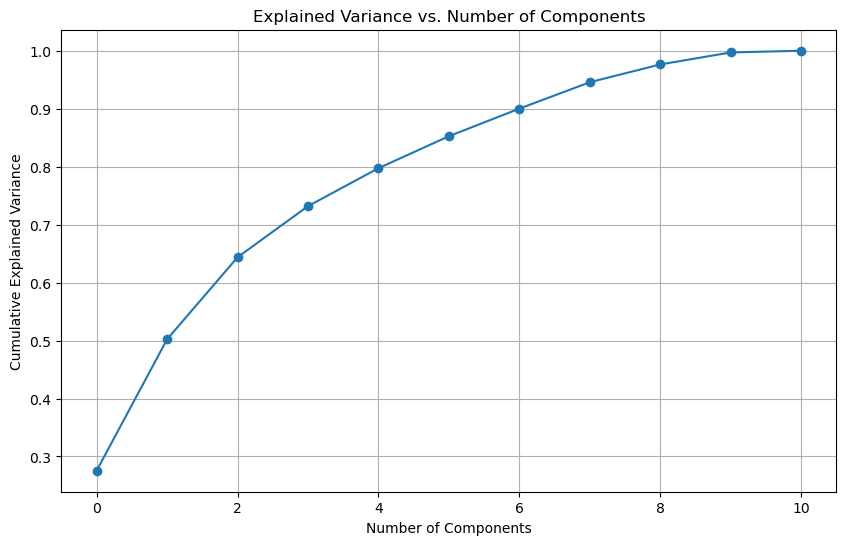

In [175]:
#Choose n_components for PCA
pca = PCA() 
pca.fit(wine_features_standardized)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [176]:
pca = PCA(n_components=7)
wine_pca = pca.fit_transform(wine_features_standardized)

## Clustering for Red v. White Wine

In [178]:
# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
wine_tsne = tsne.fit_transform(wine_pca)
wine_tsne_df = pd.DataFrame(data=wine_tsne, columns=['tSNE1', 'tSNE2'])

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(wine_tsne_df[['tSNE1', 'tSNE2']])

# Add the cluster labels to the DataFrame
wine_tsne_df['Color_Cluster'] = clusters
wine_tsne_df['Color_Cluster'] = wine_tsne_df['Color_Cluster'].apply(lambda x: 'white' if x == 0 else 'red')

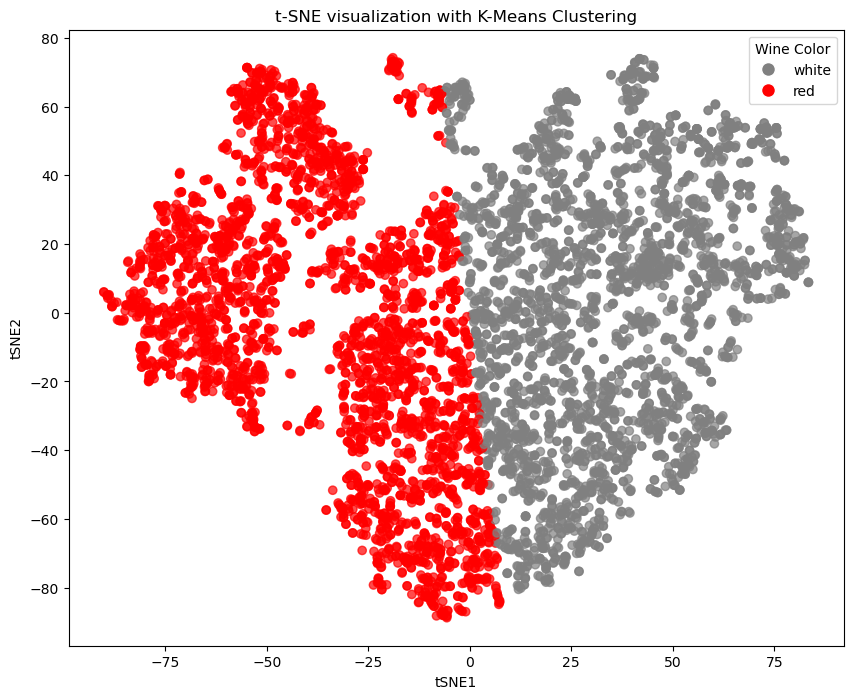

In [179]:
#Plot
colors = {'white': 'gray', 'red': 'red'}

plt.figure(figsize=(10, 8))
scatter = plt.scatter(wine_tsne_df['tSNE1'], wine_tsne_df['tSNE2'], c=wine_tsne_df['Color_Cluster'].map(colors), alpha=0.7)
plt.title('t-SNE visualization with K-Means Clustering')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{cluster}')
           for cluster, color in colors.items()]
plt.legend(handles=handles, title='Wine Color')

plt.show()

In [180]:
wine['tSNE_Color_Cluster'] = wine_tsne_df['Color_Cluster']

accuracy = accuracy_score(wine['color'], wine['tSNE_Color_Cluster'])
print(f'Accuracy of t-SNE Clustering compared to actual colors: {accuracy:.2f}')
print(pd.crosstab(wine['color'], wine['tSNE_Color_Cluster']))

Accuracy of t-SNE Clustering compared to actual colors: 0.74
tSNE_Color_Cluster   red  white
color                          
red                 1588     11
white               1667   3231


## Clustering for Wine Quality

In [182]:
# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
wine_tsne = tsne.fit_transform(wine_pca)
wine_tsne_df = pd.DataFrame(data=wine_tsne, columns=['tSNE1', 'tSNE2'])

# Perform k-means clustering
kmeans = KMeans(n_clusters=7, random_state=0)
clusters = kmeans.fit_predict(wine_tsne_df[['tSNE1', 'tSNE2']])

# Add the cluster labels to the DataFrame
wine_tsne_df['Quality_Cluster'] = clusters
wine_tsne_df['Quality_Cluster'] = wine_tsne_df['Quality_Cluster'].apply(lambda x: x + 3)

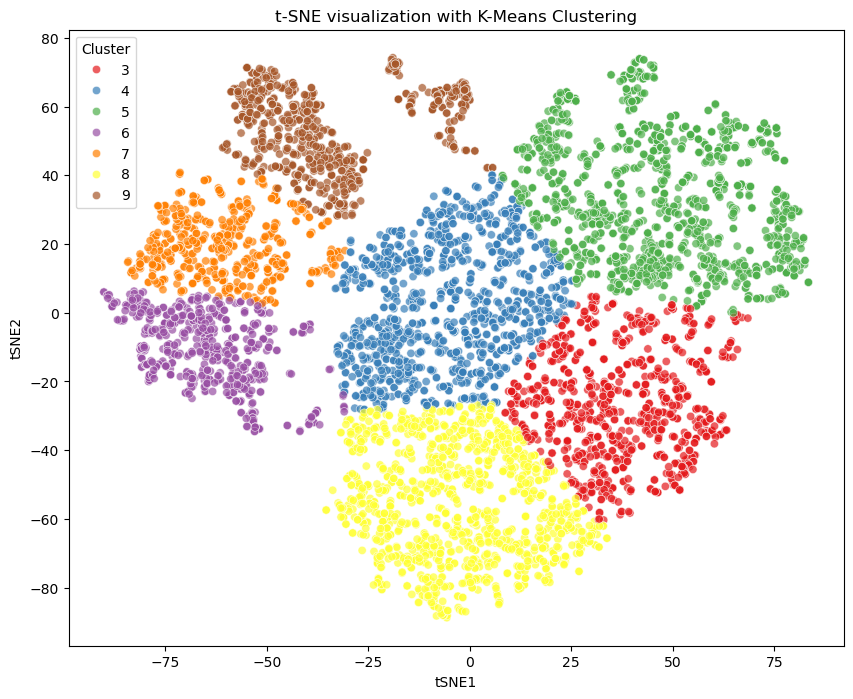

In [183]:
#Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=wine_tsne_df, x='tSNE1', y='tSNE2', hue='Quality_Cluster', palette='Set1', alpha=0.7)
plt.title('t-SNE visualization with K-Means Clustering')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.legend(title='Cluster')
plt.show()

In [184]:
wine['tSNE_Quality_Cluster'] = wine_tsne_df['Quality_Cluster']

accuracy = accuracy_score(wine['quality'], wine['tSNE_Quality_Cluster'])
print(f'Accuracy of t-SNE Clustering compared to actual quality: {accuracy:.2f}')
print(pd.crosstab(wine['quality'], wine['tSNE_Quality_Cluster']))

Accuracy of t-SNE Clustering compared to actual quality: 0.16
tSNE_Quality_Cluster    3    4    5    6    7    8    9
quality                                                
3                       9    1    5    8    1    2    4
4                      43   50   29   44   26   14   10
5                     247  354  641  220  333  139  204
6                     402  567  604  227  178  575  283
7                     140  191  107   62    7  428  144
8                      40   30   17    6    0   87   13
9                       1    0    0    0    0    4    0
